## Ranking PGH Neighborhoods by Safety Using Arrest Data

- Importing all the stuff I'll need for this project here

In [1]:
import pandas as pd

- Loading in the data from csv file, removing rows with no arrest neighborhood data, displaying them in descending order

Central Business District    19183
South Side Flats             18566
Carrick                      11604
Shadyside                     8509
Bloomfield                    8505
East Liberty                  8170
Squirrel Hill South           7576
Brookline                     7563
Mount Washington              7501
Homewood South                7150
Name: INCIDENTNEIGHBORHOOD, dtype: int64


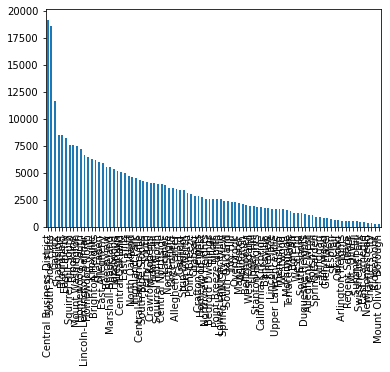

In [2]:
data = pd.read_csv("arrests.csv")
arrest_df = pd.DataFrame(data)

arrest_df = arrest_df[arrest_df['INCIDENTNEIGHBORHOOD'].str.len() > 0]
arrest_df = arrest_df.sort_values(by=["INCIDENTNEIGHBORHOOD"], ascending=True)

arrest_counts = arrest_df['INCIDENTNEIGHBORHOOD'].value_counts()
print(arrest_counts.head(10))

arrest_counts.plot(kind='bar')

- This works, but it isn't representative of the safest areas, because it's showing the neighborhoods with the lowest number of crimes as numbers with no regard to the population of that neighborhood. To make this more useful, I'm going to get a second dataset that shows the population of each neighborhood, then divide crimes/population to get a relative sense of how much crime occurs in the neighborhood.

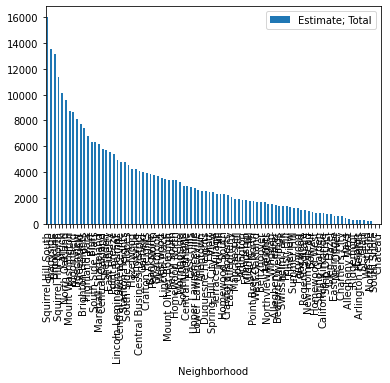

In [3]:
pop_data = pd.read_csv("populations_by_neighborhood.csv")
pop_df = pd.DataFrame(pop_data)

pop_df = pop_df.sort_values(by=["Estimate; Total"], ascending=False)

pop_df.plot(kind='bar', x='Neighborhood', y='Estimate; Total')

In [5]:
# Setting up a merge here on the arrest counts
arrest_count_df = pd.DataFrame(arrest_counts)

# I'm merging the dataframes here so I can do the arrests/population calculation
arrests_per_pop_df = pd.merge(arrest_count_df, pop_df, left_index=True, right_on='Neighborhood')

# Merging the dataframes makes the data look super messy so I'm renaming the columns I need
arrests_per_pop_df.rename(columns={'INCIDENTNEIGHBORHOOD': 'Arrests'}, inplace=True)
arrests_per_pop_df.rename(columns={'Estimate; Total': 'Population'}, inplace=True)

# Dropping all of the irrelevant columns
drop_columns = ['Margin of Error; Total','_id','Id']
arrests_per_pop_df = arrests_per_pop_df.drop(columns=drop_columns)

# Calculating the arrests in proportion to the population of the neighborhood
arrests_per_pop_df['Result'] = arrests_per_pop_df['Population'] / arrests_per_pop_df['Arrests']

# Some of the columns have really high or really low values after this calculation. For example,
# one neighborhood has 200 arrests, but its population is literally 3 since no one lives there
# because it's an industrial area, so it would be exceedingly 'unsafe' based on this calculation.
# I made a function to do this with my limited stat 1000 knowledge, yippee
def drop_outliers(df, column, lower_bound=0.25, upper_bound=0.75):
    q1 = df[column].quantile(lower_bound)
    q3 = df[column].quantile(upper_bound)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

arrests_per_pop_df = drop_outliers(arrests_per_pop_df, 'Result')

# Finally, graphing the values and finding the overall safest neighborhood.
arrests_per_pop_df = arrests_per_pop_df.sort_values(by='Result', ascending=False)
arrests_per_pop_df = arrests_per_pop_df.head(10)
arrests_per_pop_df
# arrests_per_pop_df.plot(kind='bar', x='Neighborhood', y='Result')

,Arrests,Neighborhood,Population,Result
55,342,New Homestead,973.0,2.845029
76,3992,Squirrel Hill North,11336.0,2.839679
79,1847,Stanton Heights,4761.0,2.577694
81,513,Summer Hill,1191.0,2.321637
5,1746,Banksville,3858.0,2.209622
89,1603,Westwood,3537.0,2.206488
24,1147,Duquesne Heights,2522.0,2.198779
51,1513,Morningside,3262.0,2.155981
36,3576,Greenfield,7690.0,2.150447
45,1639,Lincoln Place,3499.0,2.134838


#### Based on my analysis, the safest 10 neighborhoods in Pittsburgh, in order from most to least safe, are as follows:
1. New Homestead
2. Squirrel Hill North
3. Stanton Heights
4. Summer Hill
5. Banksville
6. Westwood
7. Duquesne Heights
8. Morningside
9. Greenfield
10. Lincoln Place

# YIPPEE!!!
###### (this project took years off the end of my life; death to Python, all hail Java)